# THE SPARK FOUNDATION

# TASK 1: Prediction using Supervised ML

Predict the percentage of an student based on the no. of study hours.

# Author: Anjali Jain

Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Reading the data from a CSV file:

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Displaying the data of a file:\n \n",data)

Displaying the data of a file:
 
     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Alternative method to display data:

In [3]:
print("All 24 rows using head: \n\n",data.head(25))

All 24 rows using head: 

     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Data Description:

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Check if dataset contains any null values:

In [5]:
data.isnull()==True # isnull can also be used.

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Dataset doesn't contain any null values.So now data can be visualize.

Plotting the data using scatterplot:

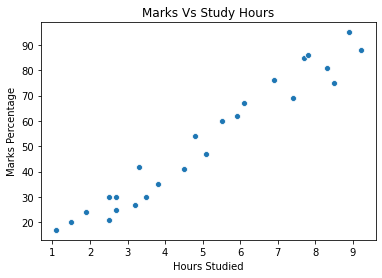

In [7]:
sns.scatterplot(data["Hours"],data["Scores"])
plt.title("Marks Vs Study Hours")
plt.ylabel("Marks Percentage")
plt.xlabel("Hours Studied")
plt.show()

From the above scatter plot, we can find the correlation between "Marks Percentage" and "Hours Studied".

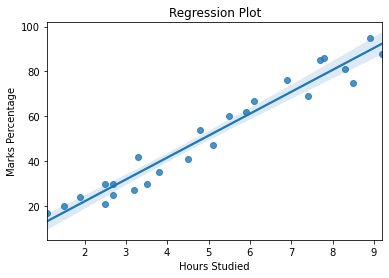

DATA CORRELATION:
            Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [10]:
sns.regplot(data["Hours"],data["Scores"])
plt.title("Regression Plot")
plt.ylabel("Marks Percentage")
plt.xlabel("Hours Studied")
plt.show()
print("DATA CORRELATION:\n",data.corr())

# Training the Model

## 1. Splitting the Data

In [14]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

## 2. Fitting the Data into the model


In [15]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

## Predicting the Percentage of Marks

In [17]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks



In [18]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores


,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing the Predicted Marks with the Actual Marks

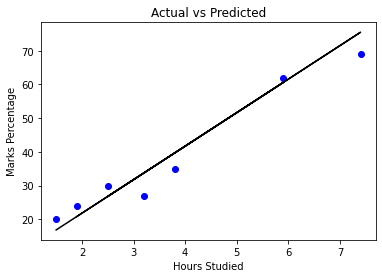

In [19]:
plt.scatter(val_X,val_y,color="blue")
plt.plot(val_X,pred_y,color="Black")
plt.title("Actual vs Predicted")
plt.ylabel("Marks Percentage")
plt.xlabel("Hours Studied")
plt.show()

## Evaluating the Model 

In [20]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [21]:
hours = [9.25]
pred_score = regression.predict([hours])
print("Predicted Score is:",pred_score)

Predicted Score is: [93.89272889]


### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.